## Averaging over bigger sample

In [5]:
import wandb
api = wandb.Api()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prefix = "amirfvb/graphQNN"

In [6]:
api = wandb.Api()
runs = []
runs += list(api.sweep(prefix + "/38a36l2x").runs) # many classical runs
runs += list(api.sweep(prefix + "/l80nirxw").runs) # quantum runs
runs += list(api.sweep(prefix + "/lua2gj4f").runs) # many quantum runs
ids = [    
    "srv1c1lz",
    "be5skar9", # additional quantum runs
    ]
for id_ in ids:
    runs.append(api.run(f"{prefix}/{id_}"))

In [7]:

rows = []

for run in runs:
        # run = api.run(f"{prefix}/{run_.id}")
        # print(run_.config)
        # print(run.config)
        if "r2_test" not in run.summary:   # run is not finished
                continue
        rows.append({"model": run.config["model"],
                    "test_loss": run.history()['test_loss'].min(),
                    "train_loss": run.history()['loss'].min(),
                    "r2_test": run.summary["r2_test"],
                    "r2_train": run.summary["r2_train"],
                    "dataset_fraction": run.config.get("dataset_fraction", 1.0),
                    })
        


df = pd.DataFrame(rows)
df.sort_values(by="dataset_fraction", inplace=True)
df

,model,test_loss,train_loss,r2_test,r2_train,dataset_fraction
54,classical,0.130414,0.004509,0.524271,0.973822,0.2
58,classical,0.357756,0.206184,-0.035771,-0.000017,0.2
57,classical,0.347628,0.206259,-0.019908,-0.000023,0.2
56,classical,0.038673,0.001169,0.826412,0.995149,0.2
50,classical,0.077442,0.014624,0.722177,0.921787,0.2
...,...,...,...,...,...,...
3,classical,0.074183,0.082627,0.752020,0.479430,1.0
2,classical,0.074163,0.046815,0.681385,0.740451,1.0
1,classical,0.213085,0.071622,0.245825,0.593618,1.0
71,quantum,0.107957,0.025170,0.656377,0.854038,1.0


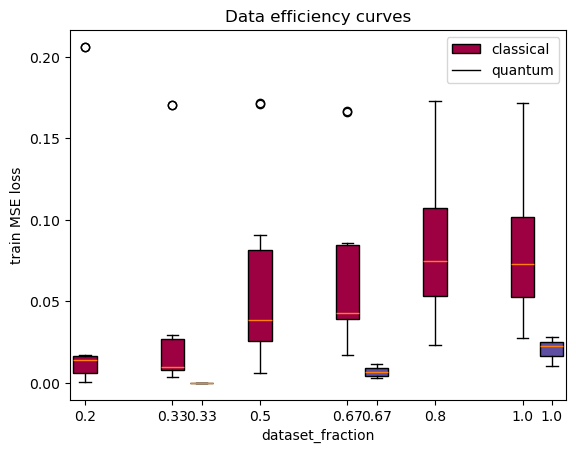

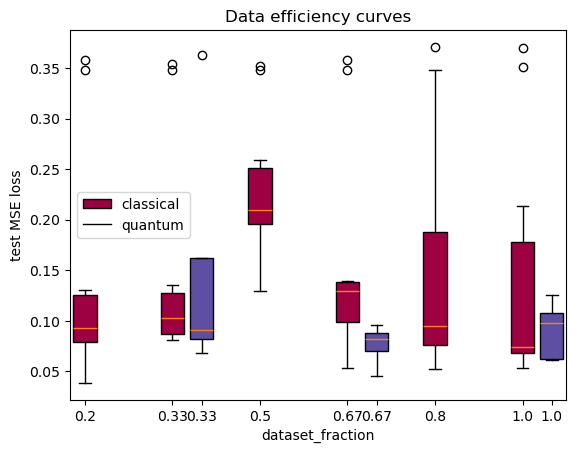

In [8]:
cmap = plt.colormaps.get("Spectral")

positions = {v: i for i, v in enumerate([0.2, 0.33, 0.5, 0.67, 0.8, 1])}


models = df["model"].unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(models))]

for train in [True, False]:
    for i, model, c in zip(range(len(models)), models, colors):
        inds = df["model"] == model
        x = df[inds]["dataset_fraction"]
        fractions = x.unique()
        y1 = df[inds]["test_loss"]
        y2 = df[inds]["train_loss"]

        if train:
            y = y2
        else:
            y = y1
        mid = []    
        error = []
        for frac in fractions:
            mask = x == frac
            ys = y[mask]
            pos = positions[frac]*(1 + len(models)) + i
            bplot = plt.boxplot(ys, positions=[pos], labels=[frac], patch_artist=True, widths=0.8)['boxes'][0]
            bplot.set_facecolor(c)


    plt.xlabel("dataset_fraction")
    plt.ylabel(f"{'train' if train else 'test'} MSE loss")
    plt.title("Data efficiency curves")
    plt.legend(["classical", "quantum"])
    plt.show()

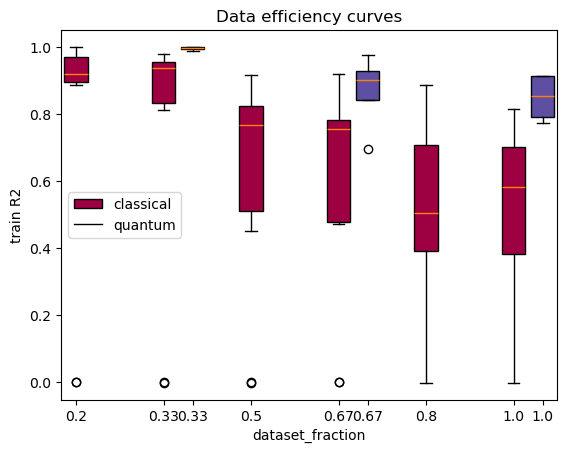

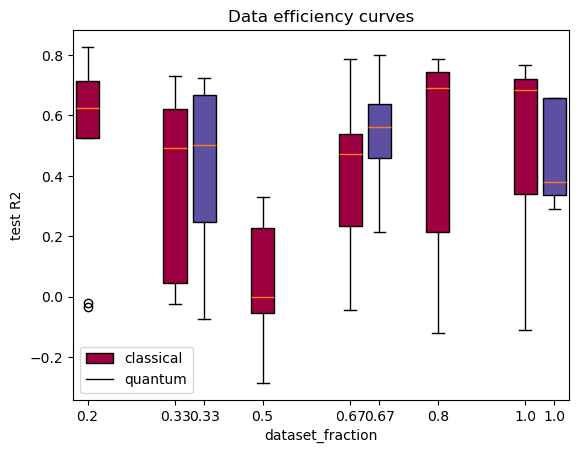

In [9]:
cmap = plt.colormaps.get("Spectral")

positions = {v: i for i, v in enumerate([0.2, 0.33, 0.5, 0.67, 0.8, 1])}


models = df["model"].unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(models))]

for train in [True, False]:
    for i, model, c in zip(range(len(models)), models, colors):
        inds = df["model"] == model
        x = df[inds]["dataset_fraction"]
        fractions = x.unique()
        y1 = df[inds]["r2_test"]
        y2 = df[inds]["r2_train"]

        if train:
            y = y2
        else:
            y = y1
        mid = []    
        error = []
        for frac in fractions:
            mask = x == frac
            ys = y[mask]
            pos = positions[frac]*(1 + len(models)) + i
            bplot = plt.boxplot(ys, positions=[pos], labels=[frac], patch_artist=True, widths=0.8)['boxes'][0]
            bplot.set_facecolor(c)


    plt.xlabel("dataset_fraction")
    plt.ylabel(f"{'train' if train else 'test'} R2")
    plt.title("Data efficiency curves")
    plt.legend(["classical", "quantum"])
    plt.show()






In [10]:
import seaborn as sns

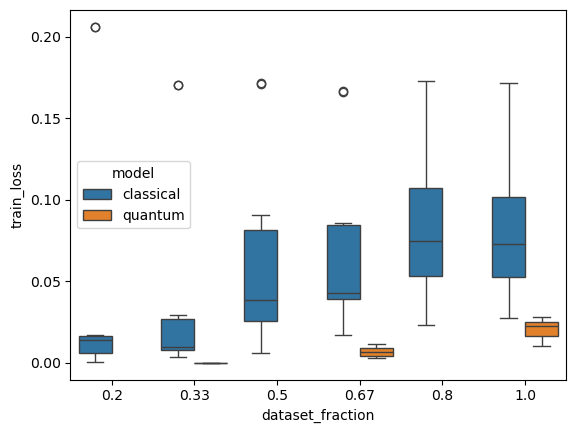

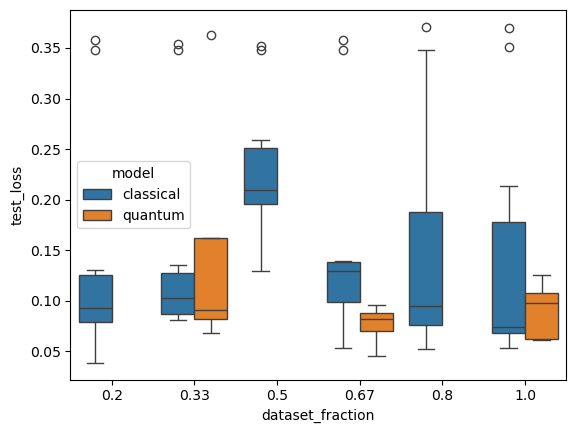

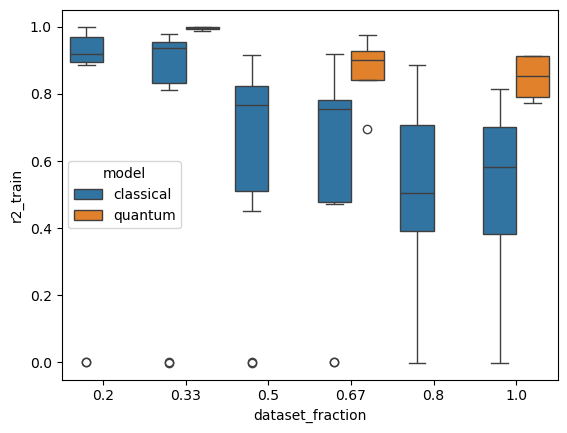

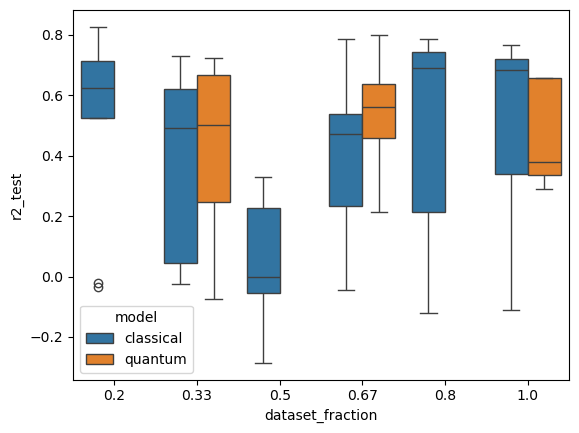

In [15]:
sns.boxplot(data=df, x="dataset_fraction", y="train_loss", hue="model")
plt.show()
sns.boxplot(data=df, x="dataset_fraction", y="test_loss", hue="model")
plt.show()
sns.boxplot(data=df, x="dataset_fraction", y="r2_train", hue="model")
plt.show()
sns.boxplot(data=df, x="dataset_fraction", y="r2_test", hue="model")
None
